### This is a use guide to demo the functionality in 0.3.1

In [1]:
from config import basic_conf as conf
from libs import ModelManager as mm
from config.constants import HyperParamKey
import logging

import matplotlib.pyplot as plt
%matplotlib inline

## In order to use the text example please load your home work 1 data like this:

![require_data](img/required_data.png)

## 1. How to init the logger

The first parameter when initializing logger will determine the log level for the rest of the session

In [2]:
# in this example we init logger with level = INFO and see that the info logs get outputted
conf.init_logger(logging.INFO, logfile=None)
logger = logging.getLogger('__main__')
mgr = mm.ModelManager(mode='notebook')

[2018-10-21 19:23:03] [INFO] Initializing Model Manager, version 0.3.1 ...
[2018-10-21 19:23:03] [INFO] 
=== Models Available ===
BagOfWords
[2018-10-21 19:23:03] [INFO] 
=== Loaders Available ===
IMDB
[2018-10-21 19:23:03] [INFO] 
*********** Model Manager Details ***********
-- self.hparams.num_epochs = 1
-- self.hparams.lr = 0.01
-- self.hparams.train_plus_val_size = 25000
-- self.hparams.test_size = 25000
-- self.hparams.val_size = 5000
-- self.hparams.voc_size = 100000
-- self.hparams.train_loop_check_freq = 100
-- self.hparams.embedding_dim = 50
-- self.hparams.batch_size = 32
-- self.hparams.ngram_size = 2
-- self.hparams.remove_punc = True
-- self.hparams.check_early_stop = True
-- self.hparams.es_look_back = 5
-- self.hparams.es_req_prog = 0.01
-- self.hparams.optim_enc = <class 'torch.optim.adam.Adam'>
-- self.hparams.optim_dec = <class 'torch.optim.adam.Adam'>
-- self.hparams.scheduler = <class 'torch.optim.lr_scheduler.ExponentialLR'>
-- self.hparams.scheduler_gamma = 0.95


In [3]:
# in this example we init logger with level = WARNING, we see that all the info logs are suppressed
conf.init_logger(logging.WARNING, logfile=None)
logger = logging.getLogger('__main__')
mgr = mm.ModelManager(mode='notebook')

The 2nd parameter in logger controls where the log file lives, by default this is mt.log in root

If you pass None, like here, then no output will be written to the log file

In [4]:
# in this example we init logger the default logfile='mt.log' parameter and see that the log was written to the file
conf.init_logger(logging.INFO)
logger = logging.getLogger('__main__')
mgr = mm.ModelManager(mode='notebook')

[2018-10-21 19:23:03] [INFO] Initializing Model Manager, version 0.3.1 ...
[2018-10-21 19:23:03] [INFO] 
=== Models Available ===
BagOfWords
[2018-10-21 19:23:03] [INFO] 
=== Loaders Available ===
IMDB
[2018-10-21 19:23:03] [INFO] 
*********** Model Manager Details ***********
-- self.hparams.num_epochs = 1
-- self.hparams.lr = 0.01
-- self.hparams.train_plus_val_size = 25000
-- self.hparams.test_size = 25000
-- self.hparams.val_size = 5000
-- self.hparams.voc_size = 100000
-- self.hparams.train_loop_check_freq = 100
-- self.hparams.embedding_dim = 50
-- self.hparams.batch_size = 32
-- self.hparams.ngram_size = 2
-- self.hparams.remove_punc = True
-- self.hparams.check_early_stop = True
-- self.hparams.es_look_back = 5
-- self.hparams.es_req_prog = 0.01
-- self.hparams.optim_enc = <class 'torch.optim.adam.Adam'>
-- self.hparams.optim_dec = <class 'torch.optim.adam.Adam'>
-- self.hparams.scheduler = <class 'torch.optim.lr_scheduler.ExponentialLR'>
-- self.hparams.scheduler_gamma = 0.95


In [5]:
!head mt.log

[2018-10-21 13:13:59] [INFO] Initializing Model Manager, version 0.3.1 ...
[2018-10-21 13:13:59] [INFO] 
=== Models Available ===
BagOfWords
[2018-10-21 13:13:59] [INFO] 
=== Loaders Available ===
IMDB
[2018-10-21 13:13:59] [INFO] 


## 2. Initializing the Model Manager in notebook or console mode

Since the tqdm handler works differently in notebook vs console, we had to branch the execution based on where we are working. Here I will initialize in in 'notebook' mode, by default it operates in console mode.

In [6]:
# let me first turn off the logging to mt.log
conf.init_logger(logging.INFO, logfile=None)

In [7]:
# this line inits the ModelManager, and puts all of the default parameters into memory
# mode='notebook' is passed to initialize in notebook mode, if nothing is passed then, it goes in console mode
mgr = mm.ModelManager(mode='notebook')

[2018-10-21 19:23:03] [INFO] Initializing Model Manager, version 0.3.1 ...
[2018-10-21 19:23:03] [INFO] 
=== Models Available ===
BagOfWords
[2018-10-21 19:23:03] [INFO] 
=== Loaders Available ===
IMDB
[2018-10-21 19:23:03] [INFO] 
*********** Model Manager Details ***********
-- self.hparams.num_epochs = 1
-- self.hparams.lr = 0.01
-- self.hparams.train_plus_val_size = 25000
-- self.hparams.test_size = 25000
-- self.hparams.val_size = 5000
-- self.hparams.voc_size = 100000
-- self.hparams.train_loop_check_freq = 100
-- self.hparams.embedding_dim = 50
-- self.hparams.batch_size = 32
-- self.hparams.ngram_size = 2
-- self.hparams.remove_punc = True
-- self.hparams.check_early_stop = True
-- self.hparams.es_look_back = 5
-- self.hparams.es_req_prog = 0.01
-- self.hparams.optim_enc = <class 'torch.optim.adam.Adam'>
-- self.hparams.optim_dec = <class 'torch.optim.adam.Adam'>
-- self.hparams.scheduler = <class 'torch.optim.lr_scheduler.ExponentialLR'>
-- self.hparams.scheduler_gamma = 0.95


### There are 3 types of parameters
All of these parameters are passed into the Model constructor when creating a new_model

- **Hyperparameters** (self.hparam): the standard hyperparameters used in your model, such as batch_size, embedding_dim, lr ... etc. (The keys are in config.constants.HyperParamKey)
- **Control Parameters** (self.cparams): controls how the model in/out behaves, these will include paths, and controls for when the model runs the save routine, whether to save each new best model, or save each epoch, or both. (The keys are in config.constants.PathKey and ControlKey)
- **Loader Parameters** (self.lparams): these are parameters that the model constructor will need to know to initialize, so far I found only the act_vocab_size was needed as when running the loader, even with a specified vocab size, the actual vocab size that gets loaded is dependent on what is in the data. Therefore these parameters can only be set after running the load routine. I've specified for the load routines to return a dict of key:param so that this variable can be set. (The keys are in config.constants.LoaderParamKey)

### 3. Calling the data loader

There is a register at mm.loaderRegister. It will contain a loader_list of available loaders and attributes with the names of the available loaders.

In [8]:
print(mm.loaderRegister.loader_list)


=== Loaders Available ===
IMDB


To call the load function using a specifict loader, just give the ModelManager.load_data function the registry key for the loader:

In [9]:
mgr.load_data(mm.loaderRegister.IMDB)

[2018-10-21 19:23:03] [INFO] Loading data using IMDB ...
[2018-10-21 19:23:04] [INFO] extracting ngrams from train/val set...



[2018-10-21 19:23:08] [INFO] extracting ngrams from test set...



[2018-10-21 19:23:11] [INFO] constructing ngram_indexer ...
[2018-10-21 19:23:11] [INFO] indexer length 20000



[2018-10-21 19:23:15] [INFO] final vocal size: 100002
[2018-10-21 19:23:15] [INFO] setting each dataset's token indexes
[2018-10-21 19:23:20] [INFO] All DataLoader pipe ready: train, val, test in ModelManager.loader.loaders (dict)


## 3b) Adding new dataloader handlers

- add the implementation child class of libs.data_loaders.BaseLoader to libs.data_loaders
- add the registry key to libs.data_loaders.registry

A example dataloader used for homework 1 is provided in libs.data_loaders.ImdbLoader

## 4. Initializing Models

New models are initialized with the ModelManager.new_model function, the parameter is the key in the model registry. All of the parameters on the ModelManager is then passed to the Model constructor

In [10]:
print(mm.modelRegister.model_list)


=== Models Available ===
BagOfWords


In [11]:
mgr.new_model(mm.modelRegister.BagOfWords)

[2018-10-21 19:23:20] [INFO] 
*********** Model: scratch Details ***********
-- self.label = scratch
-- self.hparams.num_epochs = 1
-- self.hparams.lr = 0.01
-- self.hparams.train_plus_val_size = 25000
-- self.hparams.test_size = 25000
-- self.hparams.val_size = 5000
-- self.hparams.voc_size = 100000
-- self.hparams.train_loop_check_freq = 100
-- self.hparams.embedding_dim = 50
-- self.hparams.batch_size = 32
-- self.hparams.ngram_size = 2
-- self.hparams.remove_punc = True
-- self.hparams.check_early_stop = True
-- self.hparams.es_look_back = 5
-- self.hparams.es_req_prog = 0.01
-- self.hparams.optim_enc = <class 'torch.optim.adam.Adam'>
-- self.hparams.optim_dec = <class 'torch.optim.adam.Adam'>
-- self.hparams.scheduler = <class 'torch.optim.lr_scheduler.ExponentialLR'>
-- self.hparams.scheduler_gamma = 0.95
-- self.hparams.criterion = <class 'torch.nn.modules.loss.CrossEntropyLoss'>
-- self.lparams.act_vocab_size = 100002
-- self.cparams.save_best_model = True
-- self.cparams.save_

## ** Important generalized concepts on Models:

Each epoch is subdivided into "iteration" with each iteration as a collection of n batches. n is determined by the self.hparams.train_loop_check_freq parameter.

The check_early_stop function is called for each iteration. 

The BaseModel class implements the basic training loop as well as save and load functions, save/load function folder is determined by the BaseModel.label property

Each model will have 2 training curves: self.iter_curves is saved each training "iteration". self.epoch_curves is saved at each epoch

the self.model property on the BaseModel or child model class should point to the graph (nn.Module) that implements forward and backward passing

The child model class (in the example case: BagOfWords) should implement:
- eval_model() which is a forward pass but in eval mode (no drop out, no autograd)
- check_early_stop() which is called at each training iteration




## 5. Running the training loop

In [12]:
# here our hyperparameter for number of epoch was set only to 1, so the loop runs just 1 epoch
mgr.train()

[2018-10-21 19:23:21] [INFO] stepped scheduler to epoch = 1
[2018-10-21 19:23:23] [INFO] Ep:1/1, Bt:100/625, VAcc:79.74, VLoss:94.7, TAcc:82.28, TLoss:370.5, LR:0.0100
[2018-10-21 19:23:26] [INFO] Ep:1/1, Bt:200/625, VAcc:85.40, VLoss:78.2, TAcc:89.36, TLoss:293.0, LR:0.0100
[2018-10-21 19:23:28] [INFO] Ep:1/1, Bt:300/625, VAcc:85.86, VLoss:73.8, TAcc:91.73, TLoss:266.8, LR:0.0100
[2018-10-21 19:23:31] [INFO] Ep:1/1, Bt:400/625, VAcc:87.54, VLoss:71.3, TAcc:93.91, TLoss:251.4, LR:0.0100
[2018-10-21 19:23:33] [INFO] Ep:1/1, Bt:500/625, VAcc:88.24, VLoss:70.1, TAcc:95.76, TLoss:240.6, LR:0.0100
[2018-10-21 19:23:36] [INFO] Ep:1/1, Bt:600/625, VAcc:89.42, VLoss:68.7, TAcc:97.50, TLoss:229.6, LR:0.0100

[2018-10-21 19:23:40] [INFO] training completed, results collected ...


since we have enabled saving at each epoch and each best, we should find 2 saved files:
- model_saves/checkpoint.tar - saved after the last **completed** epoch
- model_saves/model_best.tar - saved after a new best iteration was achieved (best on val acc)

## 6. Saving and Loading

In [13]:
# we can also explicitly save the model with a comment in markdown format, 
# and can override the default filename = 'checkpoint.tar'
comment = """
## Trial 1

I ran the basic training model for 1 iteration and wanted to demonstrate the save functionality

**hope you all find this useful!**
"""

mgr.save_model(comment, fn='mysave.tar')

This saves the model to model_saves/<model_label>/ and adds a README.md with the comment in that folder - once checked in, the readme.md will be automatically rendered on github.

In this case, my label was the default "scratch" so the model was saved to model_saves/scratch/

### 6b Loading

If I wanted to continue to train that model, I can load it like this (first we'll clear the model)

In [14]:
mgr.model = None  # gc-ing the existing model

# reinit
mgr.new_model(mm.modelRegister.BagOfWords, nolog=True)

# loading state
mgr.load_model(which_model='mysave.tar')

[2018-10-21 19:25:03] [INFO] New Model initialized: /scratch, all model output files will be saved here: model_saves/scratch/
[2018-10-21 19:25:03] [INFO] loading checkpoint at model_saves/scratch/checkpoint.tar
[2018-10-21 19:25:03] [INFO] Successfully loaded checkpoint!


### 6c. Continuing Training

We can add more epochs to the model and continue to train it:

**Note that the model continues where it left off in epoch 2!**

In [15]:
mgr.model.add_epochs(2)

[2018-10-21 19:25:04] [INFO] added 2 to required epochs count. 
cur epoch=1, required epochs=3


In [16]:
mgr.train()

[2018-10-21 19:25:04] [INFO] stepped scheduler to epoch = 2
[2018-10-21 19:25:07] [INFO] Ep:2/3, Bt:100/625, VAcc:88.84, VLoss:67.3, TAcc:97.58, TLoss:218.5, LR:0.0095
[2018-10-21 19:25:09] [INFO] Ep:2/3, Bt:200/625, VAcc:89.62, VLoss:65.9, TAcc:98.23, TLoss:212.3, LR:0.0095
[2018-10-21 19:25:11] [INFO] Ep:2/3, Bt:300/625, VAcc:89.34, VLoss:66.5, TAcc:98.45, TLoss:210.5, LR:0.0095
[2018-10-21 19:25:14] [INFO] Ep:2/3, Bt:400/625, VAcc:89.38, VLoss:65.9, TAcc:99.06, TLoss:206.0, LR:0.0095
[2018-10-21 19:25:16] [INFO] Ep:2/3, Bt:500/625, VAcc:89.02, VLoss:66.2, TAcc:99.32, TLoss:204.2, LR:0.0095
[2018-10-21 19:25:19] [INFO] Ep:2/3, Bt:600/625, VAcc:89.12, VLoss:66.4, TAcc:99.73, TLoss:201.2, LR:0.0095
[2018-10-21 19:25:21] [INFO] stepped scheduler to epoch = 3
[2018-10-21 19:25:23] [INFO] Ep:3/3, Bt:100/625, VAcc:89.52, VLoss:65.5, TAcc:99.92, TLoss:198.7, LR:0.0090
[2018-10-21 19:25:23] [INFO] --- stopping training due to early stop ---

[2018-10-21 19:25:27] [INFO] training completed, r

## 7. Visualizing Training Curves

I implemented a graph_training_curves() method just to see the training/val acc and loss in a graph

If the ModelManager is in notebook mode, it will output results here, if console it will output results to the model folder: model_saves/<model_label>/

It can graph either the iteration curves or the epoch curves: see below

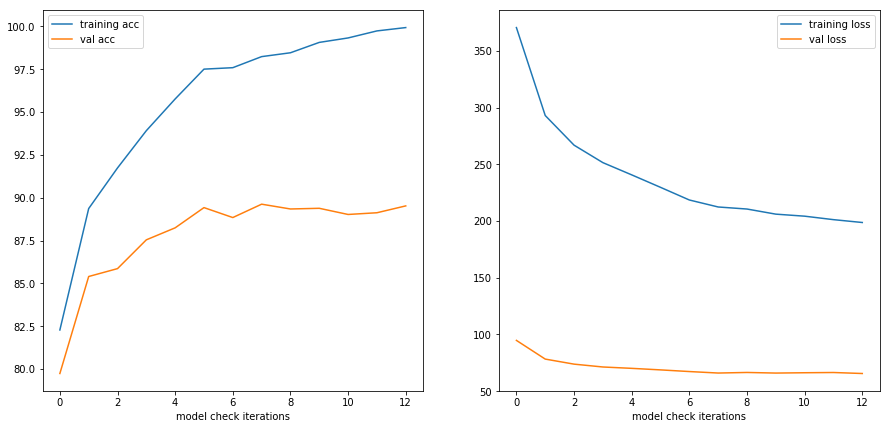

In [17]:
mgr.graph_training_curves()  # no mode param defaults to iteration mode

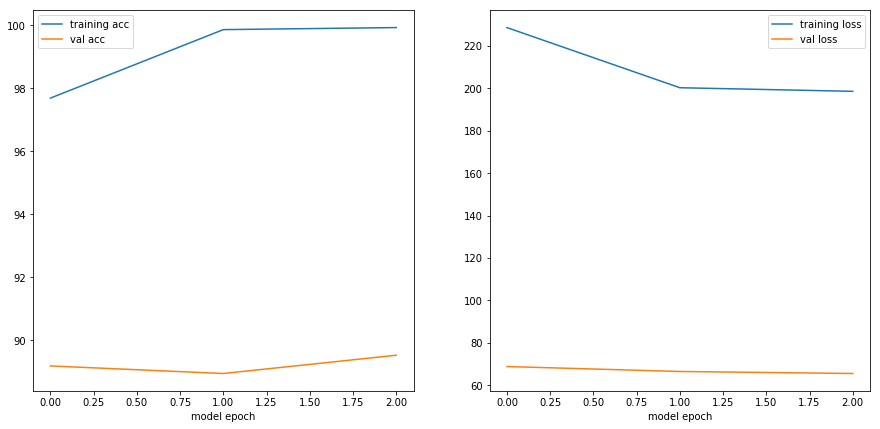

In [18]:
mgr.graph_training_curves(mode=mgr.GRAPH_MODE_EPOCH)

## 8. Reporting other training metrics back up to ModelManager

models should collect their own results values in self.output_dict in {'field': value} format.

After **each** mgr.train() call the ModelManager will collect these outputs

you can use these results to do your hyperparameter optimization

In [19]:
mgr.get_results()

,act_vocab_size,batch_size,best_val_acc,best_val_loss,check_early_stop,criterion,embedding_dim,es_look_back,es_req_prog,final_train_acc,...,optim_dec,optim_enc,remove_punc,scheduler,scheduler_gamma,test_size,train_loop_check_freq,train_plus_val_size,val_size,voc_size
0,100002,32,89.42,68.721974,True,<class 'torch.nn.modules.loss.CrossEntropyLoss'>,50,5,0.01,97.685,...,<class 'torch.optim.adam.Adam'>,<class 'torch.optim.adam.Adam'>,True,<class 'torch.optim.lr_scheduler.ExponentialLR'>,0.95,25000,100,25000,5000,100000
1,100002,32,89.62,65.945322,True,<class 'torch.nn.modules.loss.CrossEntropyLoss'>,50,5,0.01,99.925,...,<class 'torch.optim.adam.Adam'>,<class 'torch.optim.adam.Adam'>,True,<class 'torch.optim.lr_scheduler.ExponentialLR'>,0.95,25000,100,25000,5000,100000


## 9. Comprehensive example of training multiple models and collecting results:

In [20]:
# resetting the manager
mgr = mm.ModelManager(mode='notebook')

[2018-10-21 19:25:27] [INFO] Initializing Model Manager, version 0.3.1 ...
[2018-10-21 19:25:27] [INFO] 
=== Models Available ===
BagOfWords
[2018-10-21 19:25:27] [INFO] 
=== Loaders Available ===
IMDB
[2018-10-21 19:25:27] [INFO] 
*********** Model Manager Details ***********
-- self.hparams.num_epochs = 1
-- self.hparams.lr = 0.01
-- self.hparams.train_plus_val_size = 25000
-- self.hparams.test_size = 25000
-- self.hparams.val_size = 5000
-- self.hparams.voc_size = 100000
-- self.hparams.train_loop_check_freq = 100
-- self.hparams.embedding_dim = 50
-- self.hparams.batch_size = 32
-- self.hparams.ngram_size = 2
-- self.hparams.remove_punc = True
-- self.hparams.check_early_stop = True
-- self.hparams.es_look_back = 5
-- self.hparams.es_req_prog = 0.01
-- self.hparams.optim_enc = <class 'torch.optim.adam.Adam'>
-- self.hparams.optim_dec = <class 'torch.optim.adam.Adam'>
-- self.hparams.scheduler = <class 'torch.optim.lr_scheduler.ExponentialLR'>
-- self.hparams.scheduler_gamma = 0.95


In [21]:
# simple grid search
lr_list = [0.1, 0.01]
epoch_list = [1, 2]

for lr in lr_list:
    for epoch in epoch_list:
        # update hparams
        hparam_overrides = {HyperParamKey.LR:lr, HyperParamKey.NUM_EPOCH:epoch}
        mgr.hparams.update(hparam_overrides)
        
        # load data is needed in the loop if the data loaded is dependant on hparams, otherwise can put outside
        mgr.load_data(mm.loaderRegister.IMDB)  
        
        # reinits a model with
        mgr.new_model(mm.modelRegister.BagOfWords)
        
        # trains and collects results
        mgr.train()
        
        # free up memory
        mgr.dump_model()  
        
mgr.get_results()

[2018-10-21 19:25:28] [INFO] Loading data using IMDB ...
[2018-10-21 19:25:29] [INFO] extracting ngrams from train/val set...



[2018-10-21 19:25:32] [INFO] extracting ngrams from test set...



[2018-10-21 19:25:35] [INFO] constructing ngram_indexer ...
[2018-10-21 19:25:35] [INFO] indexer length 20000



[2018-10-21 19:25:39] [INFO] final vocal size: 100002
[2018-10-21 19:25:39] [INFO] setting each dataset's token indexes
[2018-10-21 19:25:44] [INFO] All DataLoader pipe ready: train, val, test in ModelManager.loader.loaders (dict)
[2018-10-21 19:25:44] [INFO] 
*********** Model: scratch Details ***********
-- self.label = scratch
-- self.hparams.num_epochs = 1
-- self.hparams.lr = 0.1
-- self.hparams.train_plus_val_size = 25000
-- self.hparams.test_size = 25000
-- self.hparams.val_size = 5000
-- self.hparams.voc_size = 100000
-- self.hparams.train_loop_check_freq = 100
-- self.hparams.embedding_dim = 50
-- self.hparams.batch_size = 32
-- self.hparams.ngram_size = 2
-- self.hparams.remove_punc = True
-- self.hparams.check_early_stop = True
-- self.hparams.es_look_back = 5
-- self.hparams.es_req_prog = 0.01
-- self.hparams.optim_enc = <class 'torch.optim.adam.Adam'>
-- self.hparams.optim_dec = <class 'torch.optim.adam.Adam'>
-- self.hparams.scheduler = <class 'torch.optim.lr_scheduler.E

[2018-10-21 19:25:44] [INFO] stepped scheduler to epoch = 1
[2018-10-21 19:25:47] [INFO] Ep:1/1, Bt:100/625, VAcc:85.22, VLoss:74.3, TAcc:87.96, TLoss:279.9, LR:0.1000
[2018-10-21 19:25:50] [INFO] Ep:1/1, Bt:200/625, VAcc:86.16, VLoss:73.6, TAcc:90.60, TLoss:266.1, LR:0.1000
[2018-10-21 19:25:52] [INFO] Ep:1/1, Bt:300/625, VAcc:87.96, VLoss:71.3, TAcc:93.74, TLoss:249.6, LR:0.1000
[2018-10-21 19:25:55] [INFO] Ep:1/1, Bt:400/625, VAcc:88.16, VLoss:69.9, TAcc:95.67, TLoss:235.3, LR:0.1000
[2018-10-21 19:25:57] [INFO] Ep:1/1, Bt:500/625, VAcc:87.24, VLoss:70.4, TAcc:96.64, TLoss:228.3, LR:0.1000
[2018-10-21 19:26:00] [INFO] Ep:1/1, Bt:600/625, VAcc:87.64, VLoss:72.5, TAcc:98.56, TLoss:233.1, LR:0.1000

[2018-10-21 19:26:04] [INFO] training completed, results collected ...
[2018-10-21 19:26:04] [INFO] Loading data using IMDB ...
[2018-10-21 19:26:06] [INFO] extracting ngrams from train/val set...



[2018-10-21 19:26:09] [INFO] extracting ngrams from test set...



[2018-10-21 19:26:12] [INFO] constructing ngram_indexer ...
[2018-10-21 19:26:12] [INFO] indexer length 20000



[2018-10-21 19:26:16] [INFO] final vocal size: 100002
[2018-10-21 19:26:16] [INFO] setting each dataset's token indexes
[2018-10-21 19:26:21] [INFO] All DataLoader pipe ready: train, val, test in ModelManager.loader.loaders (dict)
[2018-10-21 19:26:21] [INFO] 
*********** Model: scratch Details ***********
-- self.label = scratch
-- self.hparams.num_epochs = 2
-- self.hparams.lr = 0.1
-- self.hparams.train_plus_val_size = 25000
-- self.hparams.test_size = 25000
-- self.hparams.val_size = 5000
-- self.hparams.voc_size = 100000
-- self.hparams.train_loop_check_freq = 100
-- self.hparams.embedding_dim = 50
-- self.hparams.batch_size = 32
-- self.hparams.ngram_size = 2
-- self.hparams.remove_punc = True
-- self.hparams.check_early_stop = True
-- self.hparams.es_look_back = 5
-- self.hparams.es_req_prog = 0.01
-- self.hparams.optim_enc = <class 'torch.optim.adam.Adam'>
-- self.hparams.optim_dec = <class 'torch.optim.adam.Adam'>
-- self.hparams.scheduler = <class 'torch.optim.lr_scheduler.E

[2018-10-21 19:26:21] [INFO] stepped scheduler to epoch = 1
[2018-10-21 19:26:24] [INFO] Ep:1/2, Bt:100/625, VAcc:85.34, VLoss:73.8, TAcc:88.09, TLoss:277.6, LR:0.1000
[2018-10-21 19:26:26] [INFO] Ep:1/2, Bt:200/625, VAcc:86.86, VLoss:71.7, TAcc:91.00, TLoss:258.8, LR:0.1000
[2018-10-21 19:26:28] [INFO] Ep:1/2, Bt:300/625, VAcc:88.08, VLoss:69.7, TAcc:93.46, TLoss:243.6, LR:0.1000
[2018-10-21 19:26:31] [INFO] Ep:1/2, Bt:400/625, VAcc:87.24, VLoss:70.8, TAcc:94.88, TLoss:237.7, LR:0.1000
[2018-10-21 19:26:33] [INFO] Ep:1/2, Bt:500/625, VAcc:88.24, VLoss:68.9, TAcc:97.03, TLoss:224.3, LR:0.1000
[2018-10-21 19:26:36] [INFO] Ep:1/2, Bt:600/625, VAcc:86.36, VLoss:73.6, TAcc:97.78, TLoss:238.1, LR:0.1000
[2018-10-21 19:26:38] [INFO] stepped scheduler to epoch = 2
[2018-10-21 19:26:40] [INFO] Ep:2/2, Bt:100/625, VAcc:87.88, VLoss:67.2, TAcc:99.07, TLoss:202.7, LR:0.0950
[2018-10-21 19:26:43] [INFO] Ep:2/2, Bt:200/625, VAcc:88.44, VLoss:66.6, TAcc:99.40, TLoss:200.5, LR:0.0950
[2018-10-21 19:2


[2018-10-21 19:27:02] [INFO] extracting ngrams from test set...



[2018-10-21 19:27:05] [INFO] constructing ngram_indexer ...
[2018-10-21 19:27:05] [INFO] indexer length 20000



[2018-10-21 19:27:10] [INFO] final vocal size: 100002
[2018-10-21 19:27:10] [INFO] setting each dataset's token indexes
[2018-10-21 19:27:14] [INFO] All DataLoader pipe ready: train, val, test in ModelManager.loader.loaders (dict)
[2018-10-21 19:27:14] [INFO] 
*********** Model: scratch Details ***********
-- self.label = scratch
-- self.hparams.num_epochs = 1
-- self.hparams.lr = 0.01
-- self.hparams.train_plus_val_size = 25000
-- self.hparams.test_size = 25000
-- self.hparams.val_size = 5000
-- self.hparams.voc_size = 100000
-- self.hparams.train_loop_check_freq = 100
-- self.hparams.embedding_dim = 50
-- self.hparams.batch_size = 32
-- self.hparams.ngram_size = 2
-- self.hparams.remove_punc = True
-- self.hparams.check_early_stop = True
-- self.hparams.es_look_back = 5
-- self.hparams.es_req_prog = 0.01
-- self.hparams.optim_enc = <class 'torch.optim.adam.Adam'>
-- self.hparams.optim_dec = <class 'torch.optim.adam.Adam'>
-- self.hparams.scheduler = <class 'torch.optim.lr_scheduler.

[2018-10-21 19:27:14] [INFO] stepped scheduler to epoch = 1
[2018-10-21 19:27:17] [INFO] Ep:1/1, Bt:100/625, VAcc:78.00, VLoss:93.4, TAcc:80.39, TLoss:364.9, LR:0.0100
[2018-10-21 19:27:19] [INFO] Ep:1/1, Bt:200/625, VAcc:85.34, VLoss:78.2, TAcc:88.64, TLoss:293.4, LR:0.0100
[2018-10-21 19:27:21] [INFO] Ep:1/1, Bt:300/625, VAcc:87.32, VLoss:73.2, TAcc:91.95, TLoss:266.7, LR:0.0100
[2018-10-21 19:27:24] [INFO] Ep:1/1, Bt:400/625, VAcc:86.80, VLoss:72.1, TAcc:93.14, TLoss:254.4, LR:0.0100
[2018-10-21 19:27:26] [INFO] Ep:1/1, Bt:500/625, VAcc:88.48, VLoss:70.0, TAcc:95.72, TLoss:240.1, LR:0.0100
[2018-10-21 19:27:29] [INFO] Ep:1/1, Bt:600/625, VAcc:88.60, VLoss:69.3, TAcc:97.28, TLoss:231.9, LR:0.0100

[2018-10-21 19:27:33] [INFO] training completed, results collected ...
[2018-10-21 19:27:33] [INFO] Loading data using IMDB ...
[2018-10-21 19:27:35] [INFO] extracting ngrams from train/val set...



[2018-10-21 19:27:38] [INFO] extracting ngrams from test set...



[2018-10-21 19:27:41] [INFO] constructing ngram_indexer ...
[2018-10-21 19:27:41] [INFO] indexer length 20000



[2018-10-21 19:27:45] [INFO] final vocal size: 100002
[2018-10-21 19:27:45] [INFO] setting each dataset's token indexes
[2018-10-21 19:27:50] [INFO] All DataLoader pipe ready: train, val, test in ModelManager.loader.loaders (dict)
[2018-10-21 19:27:50] [INFO] 
*********** Model: scratch Details ***********
-- self.label = scratch
-- self.hparams.num_epochs = 2
-- self.hparams.lr = 0.01
-- self.hparams.train_plus_val_size = 25000
-- self.hparams.test_size = 25000
-- self.hparams.val_size = 5000
-- self.hparams.voc_size = 100000
-- self.hparams.train_loop_check_freq = 100
-- self.hparams.embedding_dim = 50
-- self.hparams.batch_size = 32
-- self.hparams.ngram_size = 2
-- self.hparams.remove_punc = True
-- self.hparams.check_early_stop = True
-- self.hparams.es_look_back = 5
-- self.hparams.es_req_prog = 0.01
-- self.hparams.optim_enc = <class 'torch.optim.adam.Adam'>
-- self.hparams.optim_dec = <class 'torch.optim.adam.Adam'>
-- self.hparams.scheduler = <class 'torch.optim.lr_scheduler.

[2018-10-21 19:27:50] [INFO] stepped scheduler to epoch = 1
[2018-10-21 19:27:52] [INFO] Ep:1/2, Bt:100/625, VAcc:78.80, VLoss:93.1, TAcc:81.79, TLoss:362.2, LR:0.0100
[2018-10-21 19:27:55] [INFO] Ep:1/2, Bt:200/625, VAcc:85.22, VLoss:78.0, TAcc:88.89, TLoss:291.1, LR:0.0100
[2018-10-21 19:27:57] [INFO] Ep:1/2, Bt:300/625, VAcc:86.94, VLoss:73.2, TAcc:92.31, TLoss:264.7, LR:0.0100
[2018-10-21 19:28:00] [INFO] Ep:1/2, Bt:400/625, VAcc:87.32, VLoss:71.7, TAcc:93.90, TLoss:252.0, LR:0.0100
[2018-10-21 19:28:02] [INFO] Ep:1/2, Bt:500/625, VAcc:88.50, VLoss:69.7, TAcc:95.86, TLoss:238.7, LR:0.0100
[2018-10-21 19:28:05] [INFO] Ep:1/2, Bt:600/625, VAcc:88.44, VLoss:69.3, TAcc:97.22, TLoss:230.7, LR:0.0100
[2018-10-21 19:28:07] [INFO] stepped scheduler to epoch = 2
[2018-10-21 19:28:10] [INFO] Ep:2/2, Bt:100/625, VAcc:89.04, VLoss:67.7, TAcc:98.28, TLoss:219.5, LR:0.0095
[2018-10-21 19:28:12] [INFO] Ep:2/2, Bt:200/625, VAcc:89.38, VLoss:67.0, TAcc:98.56, TLoss:214.3, LR:0.0095
[2018-10-21 19:2

,act_vocab_size,batch_size,best_val_acc,best_val_loss,check_early_stop,criterion,embedding_dim,es_look_back,es_req_prog,final_train_acc,...,optim_dec,optim_enc,remove_punc,scheduler,scheduler_gamma,test_size,train_loop_check_freq,train_plus_val_size,val_size,voc_size
0,100002,32,88.16,69.880417,True,<class 'torch.nn.modules.loss.CrossEntropyLoss'>,50,5,0.01,97.660,...,<class 'torch.optim.adam.Adam'>,<class 'torch.optim.adam.Adam'>,True,<class 'torch.optim.lr_scheduler.ExponentialLR'>,0.95,25000,100,25000,5000,100000
1,100002,32,88.44,66.593614,True,<class 'torch.nn.modules.loss.CrossEntropyLoss'>,50,5,0.01,99.775,...,<class 'torch.optim.adam.Adam'>,<class 'torch.optim.adam.Adam'>,True,<class 'torch.optim.lr_scheduler.ExponentialLR'>,0.95,25000,100,25000,5000,100000
2,100002,32,88.60,69.308525,True,<class 'torch.nn.modules.loss.CrossEntropyLoss'>,50,5,0.01,97.360,...,<class 'torch.optim.adam.Adam'>,<class 'torch.optim.adam.Adam'>,True,<class 'torch.optim.lr_scheduler.ExponentialLR'>,0.95,25000,100,25000,5000,100000
3,100002,32,89.38,67.005429,True,<class 'torch.nn.modules.loss.CrossEntropyLoss'>,50,5,0.01,99.940,...,<class 'torch.optim.adam.Adam'>,<class 'torch.optim.adam.Adam'>,True,<class 'torch.optim.lr_scheduler.ExponentialLR'>,0.95,25000,100,25000,5000,100000


In [22]:
# can save the results
mgr.get_results().to_csv('model_saves/results.csv')